In [1234]:
#Homework Assignment 2
#Michael Lust
#Student ID: 801094861
#4105 Intro to Machine Learning
#October 28, 2021

In [1235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1236]:
dataset = pd.read_csv("diabetes.csv")

In [1237]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1238]:
M = len(dataset)
M

768

In [1239]:
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [1240]:
#Our Data set will consider Pregnacies through Age as Independent variables (X1-X8) and Outcome as Dependent (Y). 
X=dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
Y=dataset.iloc[:,8].values
#see here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.
X[0:10] #Shows the Array

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [1241]:
#Now we’ll split our Data set into Training Data and Test Data.
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn.
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size =0.8, test_size = 0.2, random_state = 1)
X_train.shape

(614, 8)

In [1242]:
X_test.shape

(154, 8)

In [1243]:
Y_train.shape

(614,)

In [1244]:
Y_test.shape

(154,)

In [1245]:
#Now we’ll do feature scaling to scale our data between -1 and 1 using standardization.
#Here Scaling is important because there is a significant difference between explanatory variables.
from sklearn.preprocessing import StandardScaler #Assignment said to use Standardization only.
scalar_X = StandardScaler()
X_train = scalar_X.fit_transform(X_train) #New X_train is scaled
X_test = scalar_X.transform(X_test) #New X_test is scaled

In [1246]:
#Problem 1

In [1247]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state = 0 
from sklearn.linear_model import LogisticRegression
classifier_L = LogisticRegression(random_state=0)
classifier_L.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [1248]:
Y_pred = classifier_L.predict(X_test)

In [1249]:
Y_pred[0:9]

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1250]:
#Using Confusion matrix representing binary classifiers so we can get accuracy of our model.
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test,Y_pred)
cnf_matrix

array([[89, 10],
       [24, 31]], dtype=int64)

In [1251]:
#We are evaluating the model using model evaluation metrics for accuracy, precision, and recall.
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))

Accuracy: 0.7792207792207793
Precision: 0.7560975609756098
Recall: 0.5636363636363636


Text(0.5, 257.44, 'Predicted label')

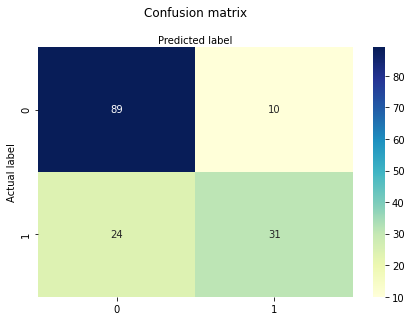

In [1252]:
#Let's visualize the results of the model in the form of a confusion matrix using matplot
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns 
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1253]:
'''
#This code block seems to only work when comparing 2 variables. 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test,Y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()),
                    np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()))
                                      #np.arange(start=X_set[:,2].min()-1,stop=X_set[:,1].max()),
                                      #np.arange(start=X_set[:,3].min()-1,stop=X_set[:,1].max()),
                                      #np.arange(start=X_set[:,4].min()-1,stop=X_set[:,1].max()),
                                      #np.arange(start=X_set[:,5].min()-1,stop=X_set[:,1].max()),
                                      #np.arange(start=X_set[:,6].min()-1,stop=X_set[:,1].max()),
                                      #np.arange(start=X_set[:,7].min()-1,stop=X_set[:,1].max()))
                                                
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1,
                                            alpha=0.75,cmap=ListedColormap('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max()) 
for i, j in enumerate(np.unique(Y_set)):
             plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
                         c=ListedColormap(('yellow','blue'))(i),label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes, Pedigree Function, Age')
plt.ylabel('Outcome')
plt.legend()
plt.show()
'''

"\n#This code block seems to only work when comparing 2 variables. \nimport warnings\nwarnings.filterwarnings('ignore')\nfrom matplotlib.colors import ListedColormap\nX_set, Y_set = X_test,Y_test\nX1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()),\n                    np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()))\n                                      #np.arange(start=X_set[:,2].min()-1,stop=X_set[:,1].max()),\n                                      #np.arange(start=X_set[:,3].min()-1,stop=X_set[:,1].max()),\n                                      #np.arange(start=X_set[:,4].min()-1,stop=X_set[:,1].max()),\n                                      #np.arange(start=X_set[:,5].min()-1,stop=X_set[:,1].max()),\n                                      #np.arange(start=X_set[:,6].min()-1,stop=X_set[:,1].max()),\n                                      #np.arange(start=X_set[:,7].min()-1,stop=X_set[:,1].max()))\n                                                \

In [1254]:
#Problem 2 

In [1255]:
#Using Naive Gaussian Bays
from sklearn.naive_bayes import GaussianNB
classifier_G = GaussianNB()
classifier_G.fit(X_train,Y_train)

GaussianNB()

In [1256]:
Y2_pred = classifier_G.predict(X_test)

In [1257]:
Y2_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [1258]:
conf_matrix = confusion_matrix(Y_test,Y2_pred)
conf_matrix

array([[85, 14],
       [21, 34]], dtype=int64)

In [1259]:
#We are evaluating the model using model evaluation metrics for accuracy, precision, and recall.
print("Accuracy:",metrics.accuracy_score(Y_test,Y2_pred))
print("Precision:",metrics.precision_score(Y_test,Y2_pred))
print("Recall:",metrics.recall_score(Y_test,Y2_pred))

Accuracy: 0.7727272727272727
Precision: 0.7083333333333334
Recall: 0.6181818181818182


Text(0.5, 257.44, 'Predicted label')

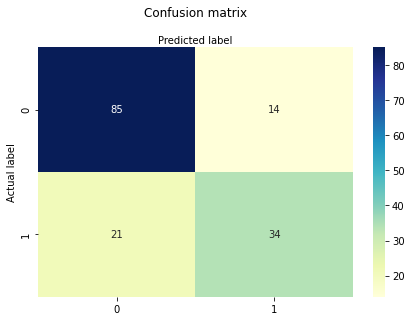

In [1260]:
#Visualizing model using confusion matrix via matplot.
#Again, we will visualize the confusion matrix using Heatmap.
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1261]:
#Problem 3 Using K-fold cross validation strategy for Logistic Regression

In [1262]:
#Our Data set will consider Pregnacies through Age as Independent variables (X1-X8) and Outcome as Dependent (Y). 
X=dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
Y=dataset.iloc[:,8].values
#see here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.
X[0:10] #Shows the Array

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [1263]:
#Doing scaling first
#Doing feature scaling to scale our data between -1 and 1 using standardization.
#Here Scaling is important because there is a significant difference between explanatory variables.
warnings.filterwarnings('ignore')

scalar_X = StandardScaler()
X = scalar_X.fit_transform(X) #New X is scaled
#X_test = scalar_X.transform(X_test) #New X_test is scaled

In [1264]:
X[0:10] #Shows the Array after scaling

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

In [1265]:
Y[0:10] #Shows the Array

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [1266]:
#Part A n = 5 folds.

In [1267]:
#Import K-fold cross validation from sklearn.model_selection
#Info gathered at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

#Doing K-5 folds
from sklearn.model_selection import KFold
X_kfold = X
Y_kfold = Y
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 
#n_splits is the number of folds for cross validation
#shuffle is a boolean expression to determine whether the data is shuffled before splitting into folds.
#random_state allows affects the ordering of the indices, which controls the randomness of each fold.

for train_index, test_index in kf.split(X):
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    Y_train, Y_test = Y_kfold[train_index], Y_kfold[test_index]
X_train.shape

KFold(n_splits=5, random_state=None, shuffle=False)


(615, 8)

In [1268]:
#Running Machine Learning Logistic Regression for K-Folds.
classifier_L.fit(X_train,Y_train)
Y3_pred = classifier_L.predict(X_test)

In [1269]:
Y3_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [1270]:
conf_matrix = confusion_matrix(Y_test,Y3_pred)
conf_matrix

array([[89, 10],
       [25, 29]], dtype=int64)

In [1271]:
#We are evaluating the model using model evaluation metrics for accuracy, precision, and recall.
print("Accuracy:",metrics.accuracy_score(Y_test,Y3_pred))
print("Precision:",metrics.precision_score(Y_test,Y3_pred))
print("Recall:",metrics.recall_score(Y_test,Y3_pred))

Accuracy: 0.7712418300653595
Precision: 0.7435897435897436
Recall: 0.5370370370370371


Text(0.5, 257.44, 'Predicted label')

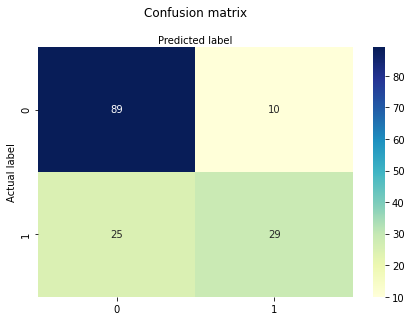

In [1272]:
#Visualizing model using confusion matrix via matplot.
#Again, we will visualize the confusion matrix using Heatmap.
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1273]:
#Part B n = 10 folds.

In [1274]:
#Doing K-10 folds
X_kfold = X
Y_kfold = Y
kf = KFold(n_splits=10)
kf.get_n_splits(X)

print(kf) 
#n_splits is the number of folds for cross validation
#shuffle is a boolean expression to determine whether the data is shuffled before splitting into folds.
#random_state allows affects the ordering of the indices, which controls the randomness of each fold.

for train_index, test_index in kf.split(X):
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    Y_train, Y_test = Y_kfold[train_index], Y_kfold[test_index]
X_train.shape

KFold(n_splits=10, random_state=None, shuffle=False)


(692, 8)

In [1275]:
#Running Machine Learning Logistic Regression for K-Folds.
classifier_L.fit(X_train,Y_train)
Y3_pred = classifier_L.predict(X_test)

In [1276]:
Y3_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1277]:
conf_matrix = confusion_matrix(Y_test,Y3_pred)
conf_matrix

array([[43,  3],
       [12, 18]], dtype=int64)

In [1278]:
#We are evaluating the model using model evaluation metrics for accuracy, precision, and recall.
print("Accuracy:",metrics.accuracy_score(Y_test,Y3_pred))
print("Precision:",metrics.precision_score(Y_test,Y3_pred))
print("Recall:",metrics.recall_score(Y_test,Y3_pred))

Accuracy: 0.8026315789473685
Precision: 0.8571428571428571
Recall: 0.6


Text(0.5, 257.44, 'Predicted label')

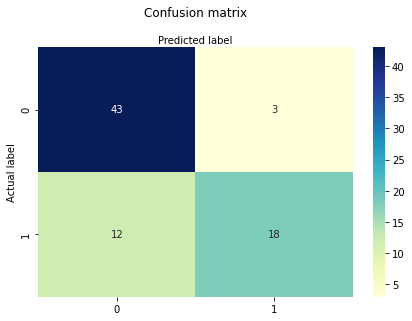

In [1279]:
#Visualizing model using confusion matrix via matplot.
#Again, we will visualize the confusion matrix using Heatmap.
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1280]:
#Problem 4 Using K-fold cross validation strategy for Naive Bays

In [1281]:
X[0:10] #Shows the Array

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

In [1282]:
Y[0:10] #Shows the Array

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [1283]:
#Part A n = 5 folds.

In [1284]:
#Import K-fold cross validation from sklearn.model_selection
#Info gathered at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

#Doing K-5 folds
from sklearn.model_selection import KFold
X_kfold = X
Y_kfold = Y
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 
#n_splits is the number of folds for cross validation
#shuffle is a boolean expression to determine whether the data is shuffled before splitting into folds.
#random_state allows affects the ordering of the indices, which controls the randomness of each fold.

for train_index, test_index in kf.split(X):
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    Y_train, Y_test = Y_kfold[train_index], Y_kfold[test_index]
X_train.shape

KFold(n_splits=5, random_state=None, shuffle=False)


(615, 8)

In [1285]:
#Running Machine Naive Gaussian Bays for K-Folds.
classifier_G.fit(X_train,Y_train)
Y4_pred = classifier_G.predict(X_test)

In [1286]:
Y4_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [1287]:
conf_matrix = confusion_matrix(Y_test,Y4_pred)
conf_matrix

array([[84, 15],
       [24, 30]], dtype=int64)

In [1288]:
#We are evaluating the model using model evaluation metrics for accuracy, precision, and recall.
print("Accuracy:",metrics.accuracy_score(Y_test,Y4_pred))
print("Precision:",metrics.precision_score(Y_test,Y4_pred))
print("Recall:",metrics.recall_score(Y_test,Y4_pred))

Accuracy: 0.7450980392156863
Precision: 0.6666666666666666
Recall: 0.5555555555555556


Text(0.5, 257.44, 'Predicted label')

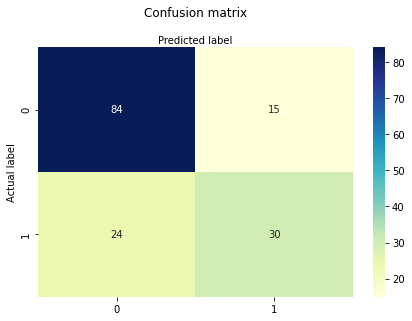

In [1289]:
#Visualizing model using confusion matrix via matplot.
#Again, we will visualize the confusion matrix using Heatmap.
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1290]:
#Part B n = 10 folds

In [1291]:
#Doing K-10 folds
X_kfold = X
Y_kfold = Y
kf = KFold(n_splits=10)
kf.get_n_splits(X)

print(kf) 
#n_splits is the number of folds for cross validation
#shuffle is a boolean expression to determine whether the data is shuffled before splitting into folds.
#random_state allows affects the ordering of the indices, which controls the randomness of each fold.

for train_index, test_index in kf.split(X):
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    Y_train, Y_test = Y_kfold[train_index], Y_kfold[test_index]
X_train.shape

KFold(n_splits=10, random_state=None, shuffle=False)


(692, 8)

In [1292]:
#Running Machine Naive Gaussian Bays for K-Folds.
classifier_G.fit(X_train,Y_train)
Y4_pred = classifier_G.predict(X_test)

In [1293]:
Y4_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [1294]:
conf_matrix = confusion_matrix(Y_test,Y4_pred)
conf_matrix

array([[40,  6],
       [13, 17]], dtype=int64)

In [1295]:
#We are evaluating the model using model evaluation metrics for accuracy, precision, and recall.
print("Accuracy:",metrics.accuracy_score(Y_test,Y4_pred))
print("Precision:",metrics.precision_score(Y_test,Y4_pred))
print("Recall:",metrics.recall_score(Y_test,Y4_pred))

Accuracy: 0.75
Precision: 0.7391304347826086
Recall: 0.5666666666666667


Text(0.5, 257.44, 'Predicted label')

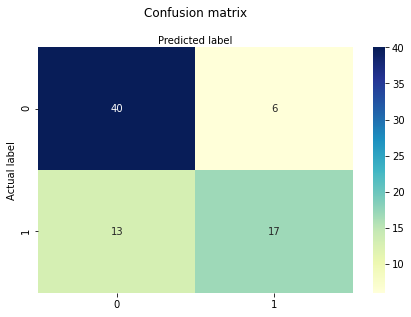

In [1296]:
#Visualizing model using confusion matrix via matplot.
#Again, we will visualize the confusion matrix using Heatmap.
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')